1. Найти экстремумы. <br>
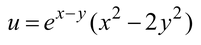

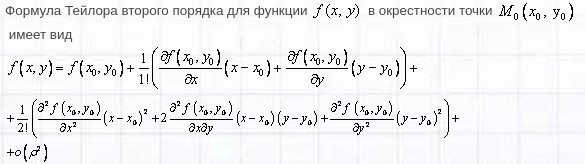

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sci
from matplotlib import cm
from sympy import *

x, y = symbols('x, y', real=True)

z = exp(x - y) * (x**2 - 2 * y**2)

print('Уравнение поверхности: z = ',z)

# Производные первого порядка по x и y
z_d_x = diff(z, x, 1)
z_d_y = diff(z, y, 1)

print('\nЧастная производная по x:\n', z_d_x)
print('\nЧастная производная по y:\n', z_d_y)

# Выражаем y из z_d_x и подставляем в z_d_y
z_d_y1 = z_d_y.subs([(y, solve(z_d_x, y)[0])])
z_d_y2 = z_d_y.subs([(y, solve(z_d_x, y)[1])])

# print('\ny из частной производной по x: ', solve(z_d_x, y))
# print('\nЧастная производная по y (подставили выражение сверху): \n', z_d_y1, '\n', z_d_y2)

# Находим координаты x стац. точек
x_stac = solve(z_d_y1, x)
# print('\nx stac ', solve(z_d_y1, x))

# Подставляем координаты x стац. точек в частн. произв. по x
# и выражаем из неё координаты точки y
y_stac1 = solve(z_d_x.subs([(x, x_stac[0])]), y)
# print('y stac 1 ', y_stac1)

y_stac2 = solve(z_d_x.subs([(x, x_stac[1])]), y)
# print('y stac 2 ', y_stac2)

p1 = Point(x_stac[0], y_stac1[0])
p2 = Point(x_stac[1], y_stac2[0])

y_stac1 = solve(z_d_y.subs([(x, x_stac[0])]), y)
# print('y stac 3 ', y_stac1)

y_stac2 = solve(z_d_y.subs([(x, x_stac[1])]), y)
# print('y stac 4 ', y_stac2)

p3 = Point(x_stac[0], y_stac1[1])
p4 = Point(x_stac[1], y_stac2[1])

print('\nСтац. точки: ')
pprint(p1)
pprint(p2)
pprint(p3)
pprint(p4)

Уравнение поверхности: z =  (x**2 - 2*y**2)*exp(x - y)

Частная производная по x:
 2*x*exp(x - y) + (x**2 - 2*y**2)*exp(x - y)

Частная производная по y:
 -4*y*exp(x - y) - (x**2 - 2*y**2)*exp(x - y)

Стац. точки: 
Point2D(-4, -2)
Point2D(0, 0)
Point2D(-4, 4)
Point2D(0, 2)


In [21]:
# Уравнения Тейлора в стац. точках (2 приближение)

p = p1

z_t1 = (z.subs([(x, p[0]), (y, p[1])]) +
z_d_x.subs([(x, p[0]), (y, p[1])]) * (x - p[0]) +
z_d_y.subs([(x, p[0]), (y, p[1])]) * (y - p[1]) +
0.5 * diff(z, x, 2).subs([(x, p[0]), (y, p[1])]) * (x - p[0])**2 +
0.5 * diff(z, y, 2).subs([(x, p[0]), (y, p[1])]) * (y - p[1])**2 +
diff(diff(z, x, 1), y, 1).subs([(x, p[0]), (y, p[1])]) * (x - p[0]) * (y - p[1]))

# z_t1 = (z.subs([(x, p[0]), (y, p[1])]) +
# z_d_x.subs([(x, p[0]), (y, p[1])]) * (x - p[0]) +
# z_d_y.subs([(x, p[0]), (y, p[1])]) * (y - p[1]) +
# 100000 * diff(z, x, 2).subs([(x, p[0]), (y, p[1])]) * (x - p[0])**2 +
# 100000 * diff(z, y, 2).subs([(x, p[0]), (y, p[1])]) * (y - p[1])**2 +
# 50000 * diff(diff(z, x, 1), y, 1).subs([(x, p[0]), (y, p[1])]) * (x - p[0]) * (y - p[1]))

p = p2

z_t2 = (z.subs([(x, p[0]), (y, p[1])]) +
z_d_x.subs([(x, p[0]), (y, p[1])]) * (x - p[0]) +
z_d_y.subs([(x, p[0]), (y, p[1])]) * (y - p[1]) +
0.5 * diff(z, x, 2).subs([(x, p[0]), (y, p[1])]) * (x - p[0])**2 +
0.5 * diff(z, y, 2).subs([(x, p[0]), (y, p[1])]) * (y - p[1])**2 +
diff(diff(z, x, 1), y, 1).subs([(x, p[0]), (y, p[1])]) * (x - p[0]) * (y - p[1]))

# z_t2 = (z.subs([(x, p[0]), (y, p[1])]) +
# z_d_x.subs([(x, p[0]), (y, p[1])]) * (x - p[0]) +
# z_d_y.subs([(x, p[0]), (y, p[1])]) * (y - p[1]) +
# 50000 * diff(z, x, 2).subs([(x, p[0]), (y, p[1])]) * (x - p[0])**2 +
# 50000 * diff(z, y, 2).subs([(x, p[0]), (y, p[1])]) * (y - p[1])**2 +
# 25000 * diff(diff(z, x, 1), y, 1).subs([(x, p[0]), (y, p[1])]) * (x - p[0]) * (y - p[1]))


p = p3

z_t3 = (z.subs([(x, p[0]), (y, p[1])]) +
z_d_x.subs([(x, p[0]), (y, p[1])]) * (x - p[0]) +
z_d_y.subs([(x, p[0]), (y, p[1])]) * (y - p[1]) +
0.5 * diff(z, x, 2).subs([(x, p[0]), (y, p[1])]) * (x - p[0])**2 +
0.5 * diff(z, y, 2).subs([(x, p[0]), (y, p[1])]) * (y - p[1])**2 +
diff(diff(z, x, 1), y, 1).subs([(x, p[0]), (y, p[1])]) * (x - p[0]) * (y - p[1]))

# z_t3 = (z.subs([(x, p[0]), (y, p[1])]) +
# z_d_x.subs([(x, p[0]), (y, p[1])]) * (x - p[0]) +
# z_d_y.subs([(x, p[0]), (y, p[1])]) * (y - p[1]) +
# 50000 * diff(z, x, 2).subs([(x, p[0]), (y, p[1])]) * (x - p[0])**2 +
# 50000 * diff(z, y, 2).subs([(x, p[0]), (y, p[1])]) * (y - p[1])**2 +
# 25000 * diff(diff(z, x, 1), y, 1).subs([(x, p[0]), (y, p[1])]) * (x - p[0]) * (y - p[1]))

p = p4

z_t4 = (z.subs([(x, p[0]), (y, p[1])]) +
z_d_x.subs([(x, p[0]), (y, p[1])]) * (x - p[0]) +
z_d_y.subs([(x, p[0]), (y, p[1])]) * (y - p[1]) +
0.5 * diff(z, x, 2).subs([(x, p[0]), (y, p[1])]) * (x - p[0])**2 +
0.5 * diff(z, y, 2).subs([(x, p[0]), (y, p[1])]) * (y - p[1])**2 +
diff(diff(z, x, 1), y, 1).subs([(x, p[0]), (y, p[1])]) * (x - p[0]) * (y - p[1]))

# z_t4 = (z.subs([(x, p[0]), (y, p[1])]) +
# z_d_x.subs([(x, p[0]), (y, p[1])]) * (x - p[0]) +
# z_d_y.subs([(x, p[0]), (y, p[1])]) * (y - p[1]) +
# 50000 * diff(z, x, 2).subs([(x, p[0]), (y, p[1])]) * (x - p[0])**2 +
# 50000 * diff(z, y, 2).subs([(x, p[0]), (y, p[1])]) * (y - p[1])**2 +
# 25000 * diff(diff(z, x, 1), y, 1).subs([(x, p[0]), (y, p[1])]) * (x - p[0]) * (y - p[1]))

print('\nПриближения Тейлора 2 порядка в стац. точках:')
print(z_t1)
print(z_t2)
print(z_t3)
print(z_t4)



Приближения Тейлора 2 порядка в стац. точках:
-3.0*(x + 4)**2*exp(-2) + 8*(x + 4)*(y + 2)*exp(-2) - 6.0*(y + 2)**2*exp(-2) + 8*exp(-2)
1.0*x**2 - 2.0*y**2
-15.0*(x + 4)**2*exp(-8) + 8*(x + 4)*(y - 4)*exp(-8) - 24*(x + 4)*exp(-8) + 6.0*(y - 4)**2*exp(-8) - 16*exp(-8)
-3.0*x**2*exp(-2) - 8*x*exp(-2) + 2.0*(y - 2)**2*exp(-2) - 8*exp(-2)


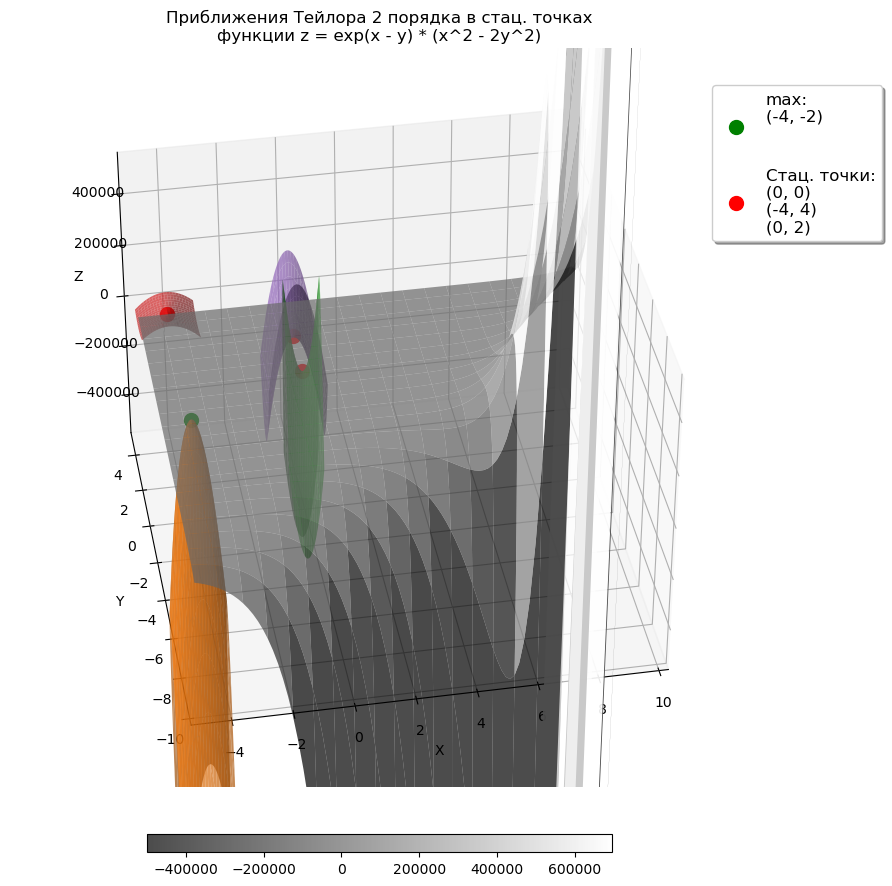

In [34]:
# построение графика

f = lambda x, y: np.exp(x - y) * (x**2 - 2 * y**2) # строим плоскость

fig = plt.figure(figsize=(12, 12)) # создаём холст

ax = fig.add_subplot(1, 1, 1, projection='3d')

xval = np.linspace(-5, 10, 100) # разбиение для x
yval = np.linspace(-10, 4, 100) # разбиение для y

x, y = np.meshgrid(xval, yval)

# вычисляем значения z в точках
z = f(x, y)

# строим плоскость по функции
surf = ax.plot_surface(x, y, z, rstride=5, cstride=5, alpha=0.7,
                        cmap=cm.gray, vmin=-500000, vmax=696577)

fig.colorbar(surf, shrink=0.5, aspect=25, orientation = 'horizontal', pad=0.05)

ax.set_zlim(-536577, 536577)
ax.set_xlim(-5, 10)
ax.set_ylim(-10, 5)

# -------------------- Taylor eq in point 1 --------------------------
f1_t = lambda x, y: (-6000000*(x + 4)**2*exp(-2) +
                      4000000*(x + 4)*(y + 2)*exp(-2) -
                      12000000*(y + 2)**2*exp(-2) + 8*exp(-2))

# # ax = fig.add_subplot(1, 1, 1, projection='3d')

xval = np.linspace(-5, -3, 100) # разбиение для x
yval = np.linspace(-3, -1, 100) # разбиение для y

x, y = np.meshgrid(xval, yval)

z = f1_t(x, y) # вычисляем значения z в точках

surf = ax.plot_surface(x, y, z, rstride=5, cstride=5, alpha=0.7) # строим плоскость

# -------------------- Taylor eq in point 2 --------------------------
f2_t = lambda x, y: (1000000*x**2 - 2000000*y**2)

# # ax = fig.add_subplot(1, 1, 1, projection='3d')

xval = np.linspace(-0.6, 0.6, 100) # разбиение для x
yval = np.linspace(-0.6, 0.6, 100) # разбиение для y

x, y = np.meshgrid(xval, yval)

z = f2_t(x, y) # вычисляем значения z в точках

surf = ax.plot_surface(x, y, z, rstride=5, cstride=5, alpha=0.7) # строим плоскость


# -------------------- Taylor eq in point 3 --------------------------

f3_t = lambda x, y: (-150000000*(x + 4)**2*exp(-8) + 20000000*(x + 4)*(y - 4)*exp(-8) -
                      24*(x + 4)*exp(-8) + 60000000*(y - 4)**2*exp(-8) - 16*exp(-8))

# # ax = fig.add_subplot(1, 1, 1, projection='3d')

xval = np.linspace(-5, -3, 100) # разбиение для x
yval = np.linspace(3, 5, 100) # разбиение для y

x, y = np.meshgrid(xval, yval)

z = f3_t(x, y) # вычисляем значения z в точках

surf = ax.plot_surface(x, y, z, rstride=5, cstride=5, alpha=0.7) # строим плоскость


# -------------------- Taylor eq in point 4 --------------------------

f3_t = lambda x, y: (-3000000*x**2*exp(-2) - 8*x*exp(-2) + 2000000*(y - 2)**2*exp(-2) - 8*exp(-2))

# # ax = fig.add_subplot(1, 1, 1, projection='3d')

xval = np.linspace(-1, 1, 100) # разбиение для x
yval = np.linspace(1, 3, 100) # разбиение для y

x, y = np.meshgrid(xval, yval)

z = f3_t(x, y) # вычисляем значения z в точках

surf = ax.plot_surface(x, y, z, rstride=5, cstride=5, alpha=0.7) # строим плоскость

# --------------------------------------------------------------------

# точки на плоскости
p1 = np.array([[float(p1[0])], [float(p1[1])], [f(float(p1[0]), float(p1[1]))]])
p2 = np.array([[float(p2[0])], [float(p2[1])], [f(float(p2[0]), float(p2[1]))]])
p3 = np.array([[float(p3[0])], [float(p3[1])], [f(float(p3[0]), float(p3[1]))]])
p4 = np.array([[float(p4[0])], [float(p4[1])], [f(float(p4[0]), float(p4[1]))]])

# построение точек
ax.scatter(p1[0], p1[1], p1[2], c='green', marker='.', s=400,
            label='max:\n(-4, -2)\n\n')
ax.scatter(p2[0], p2[1], p2[2], c='red', marker='.', s=400,
            label='Стац. точки:\n(0, 0)\n(-4, 4)\n(0, 2)')
ax.scatter(p3[0], p3[1], p3[2], c='red', marker='.', s=400)
ax.scatter(p4[0], p4[1], p4[2], c='red', marker='.', s=400)

plt.legend(bbox_to_anchor=(0.95, 0.95), loc='upper left',
           borderaxespad=0.0, shadow=True, fontsize="12")

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.title('Приближения Тейлора 2 порядка в стац. точках\n'
          'функции z = exp(x - y) * (x^2 - 2y^2)')

ax.view_init(37, -100)

plt.show()